In [1]:
import rte
import numpy as np
import vegas_params as vp

In [2]:
import pylab as plt

In [3]:
from tqdm.auto import tqdm

In [4]:
#fixed values for the source and target
T=1e-7
src = rte.Source(R=vp.Vector([0,0,0]),
             T=0,
             s=vp.Vector([0,0,1])
            )
tgt = rte.Target(R=vp.Vector([1,0,1]),
             T=T,
             s=vp.Direction(1,0) #a fixed direction, since it will not be used anyway
            )

In [5]:
#create the process

#params_nitn = [2,5,10]#,15,20]
params_nitn = [2,5,10,12,15,17,20,25]
#params_neval = [100,500,1000,2000,5000,10000,20000,50000,100000,200000]
params_neval = [5000,10000,20000,50000,100000,200000]
#params_neval = [5000,10000]#,20000,50000,100000,200000]
#params_neval = [100,1000,5000,10000,20000,100000]
Ns = range(2,6)

In [6]:
import pandas as pd
results = {}
for N in tqdm(Ns):
    p0 = rte.Process(src,tgt,medium=rte.medium.water, Nsteps=N, use_uniform_sampling=True)
    p1 = rte.Process(src,tgt,medium=rte.medium.water, Nsteps=N, use_uniform_sampling=False)
    for nitn in tqdm(params_nitn, desc=f'Nsteps = {N}'):
        for neval in tqdm(params_neval, desc=f'nitn={nitn}', leave=False):
            r0 = p0.calculate(nitn=nitn,neval=neval, adapt=True)
            r1 = p1.calculate(nitn=nitn,neval=neval, adapt=True)
            results[(N,nitn,neval)] = [r0.mean,r0.sdev,r1.mean,r1.sdev]

  0%|          | 0/4 [00:00<?, ?it/s]

Nsteps = 2:   0%|          | 0/8 [00:00<?, ?it/s]

nitn=2:   0%|          | 0/6 [00:00<?, ?it/s]

nitn=5:   0%|          | 0/6 [00:00<?, ?it/s]

nitn=10:   0%|          | 0/6 [00:00<?, ?it/s]

nitn=12:   0%|          | 0/6 [00:00<?, ?it/s]

nitn=15:   0%|          | 0/6 [00:00<?, ?it/s]

nitn=17:   0%|          | 0/6 [00:00<?, ?it/s]

nitn=20:   0%|          | 0/6 [00:00<?, ?it/s]

nitn=25:   0%|          | 0/6 [00:00<?, ?it/s]

Nsteps = 3:   0%|          | 0/8 [00:00<?, ?it/s]

nitn=2:   0%|          | 0/6 [00:00<?, ?it/s]

nitn=5:   0%|          | 0/6 [00:00<?, ?it/s]

nitn=10:   0%|          | 0/6 [00:00<?, ?it/s]

nitn=12:   0%|          | 0/6 [00:00<?, ?it/s]

nitn=15:   0%|          | 0/6 [00:00<?, ?it/s]

nitn=17:   0%|          | 0/6 [00:00<?, ?it/s]

nitn=20:   0%|          | 0/6 [00:00<?, ?it/s]

nitn=25:   0%|          | 0/6 [00:00<?, ?it/s]

Nsteps = 4:   0%|          | 0/8 [00:00<?, ?it/s]

nitn=2:   0%|          | 0/6 [00:00<?, ?it/s]

nitn=5:   0%|          | 0/6 [00:00<?, ?it/s]

nitn=10:   0%|          | 0/6 [00:00<?, ?it/s]

nitn=12:   0%|          | 0/6 [00:00<?, ?it/s]

nitn=15:   0%|          | 0/6 [00:00<?, ?it/s]

nitn=17:   0%|          | 0/6 [00:00<?, ?it/s]

nitn=20:   0%|          | 0/6 [00:00<?, ?it/s]

nitn=25:   0%|          | 0/6 [00:00<?, ?it/s]

Nsteps = 5:   0%|          | 0/8 [00:00<?, ?it/s]

nitn=2:   0%|          | 0/6 [00:00<?, ?it/s]

nitn=5:   0%|          | 0/6 [00:00<?, ?it/s]

nitn=10:   0%|          | 0/6 [00:00<?, ?it/s]

nitn=12:   0%|          | 0/6 [00:00<?, ?it/s]

nitn=15:   0%|          | 0/6 [00:00<?, ?it/s]

nitn=17:   0%|          | 0/6 [00:00<?, ?it/s]

nitn=20:   0%|          | 0/6 [00:00<?, ?it/s]

nitn=25:   0%|          | 0/6 [00:00<?, ?it/s]

In [10]:
df = pd.DataFrame(results,
                  columns=pd.MultiIndex.from_product([Ns,params_nitn,params_neval],names=['Nsteps','nitn','neval']), 
                  index = pd.MultiIndex.from_product([['Uniform','HG'],['mean','sdev']], names=['distr','mean_std']), 
                 )
df

Nsteps                   2                                                    \
nitn                    2                                                      
neval               5000      10000     20000     50000     100000    200000   
distr   mean_std                                                               
Uniform mean      4.488999  4.503127  4.479497  4.485434  4.487990  4.485796   
        sdev      0.020519  0.018043  0.012445  0.006884  0.002936  0.006570   
HG      mean      4.452984  4.446628  4.453052  4.496614  4.470671  4.488647   
        sdev      0.033498  0.019469  0.016581  0.007423  0.005788  0.003538   

Nsteps                                                    ...         5  \
nitn                    5                                 ...        20   
neval               5000      10000     20000     50000   ...    20000    
distr   mean_std                                          ...             
Uniform mean      4.486996  4.472134  4.488538  4.491940  ...  0.009435   
        sdev      0.012682  0.008521  0.004781  0.002522  ...  0.000320   
HG      mean      4.457994  4.485043  4.503989  4.485582  ...  0.012568   
        sdev      0.014720  0.009108  0.005808  0.002866  ...  0.000212   

Nsteps                                                                        \
nitn                                                  25                       
neval               50000     100000    200000    5000      10000     20000    
distr   mean_std                                                               
Uniform mean      0.010866  0.011276  0.012088  0.007290  0.008237  0.009078   
        sdev      0.000311  0.000256  0.000232  0.000312  0.000246  0.000286   
HG      mean      0.013726  0.013777  0.014087  0.012283  0.012142  0.013066   
        sdev      0.000188  0.000155  0.000122  0.000303  0.000223  0.000200   

Nsteps                                          
nitn                                            
neval               50000     100000    200000  
distr   mean_std                                
Uniform mean      0.010994  0.011467  0.011878  
        sdev      0.000232  0.000233  0.000218  
HG      mean      0.013501  0.013631  0.014187  
        sdev      0.000166  0.000140  0.000122  

[4 rows x 192 columns]

In [13]:
cm = plt.cm.inferno

def plot_band(x,y,dy, **kwargs):
    kwargs.setdefault('alpha',0.5)
    f = plt.fill_between(x,y-dy,y+dy, **kwargs)
    return f

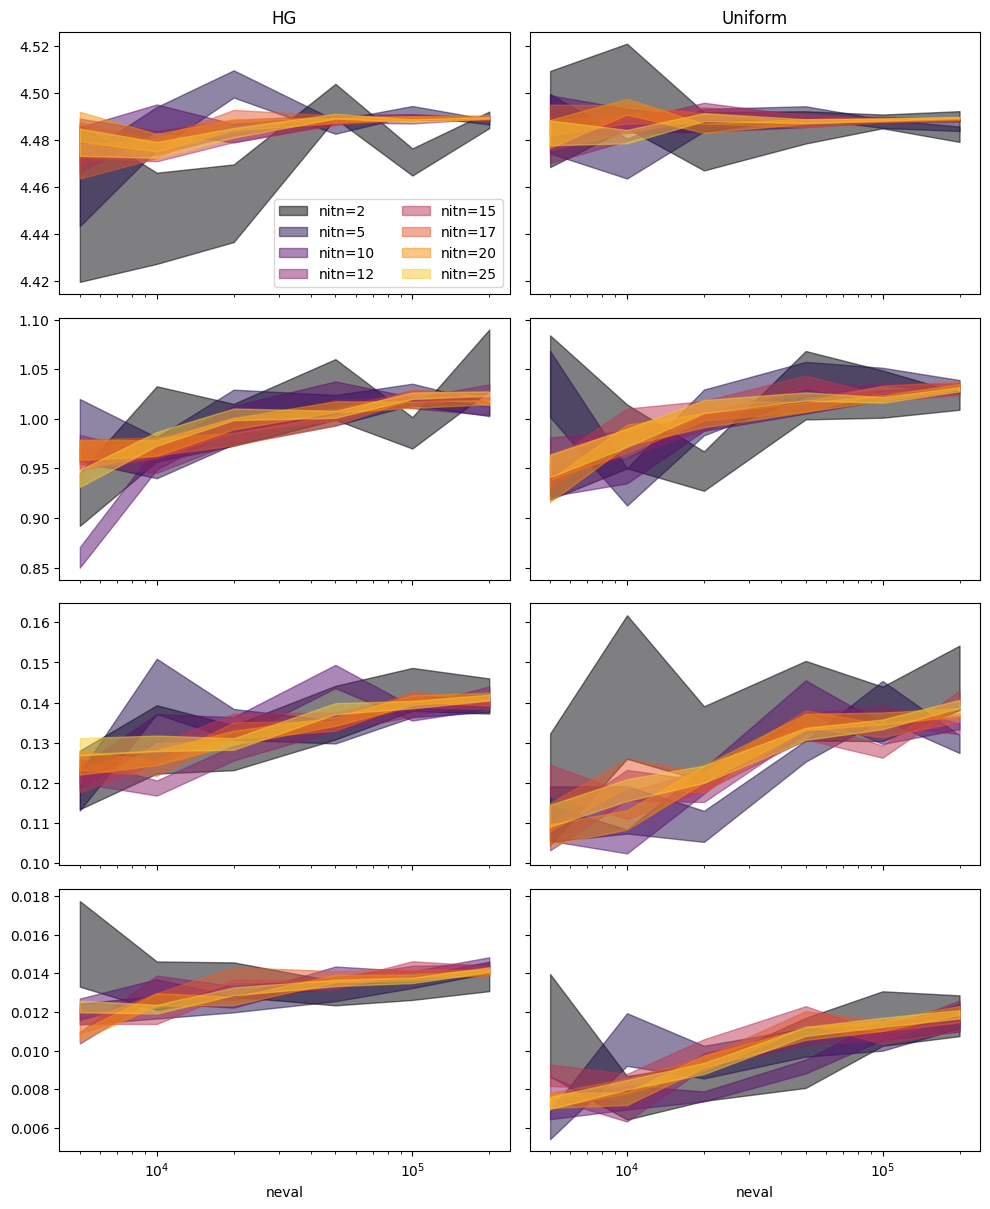

In [24]:
fig,axes = plt.subplots(len(Ns),2, sharex=True, figsize=(10,3*len(Ns)), sharey='row')

nskip=0
for i0,N in enumerate(Ns):
    for i1,val in enumerate(df.index.levels[0]):
        plt.sca(axes[i0,i1])
        axes[0,i1].set_title(val)
        for i2,nitn in enumerate(params_nitn):
            color=cm(i2/(len(params_nitn)-nskip))
            dfc = df[N,nitn].T[val]
            plot_band(dfc.index.values, dfc['mean'], dfc['sdev'], label=f'nitn={nitn}', color=color)
        plt.xscale('log')

axes[0][0].legend(loc='lower right',ncol=2)
plt.tight_layout()
axes[-1][0].set_xlabel('neval')
axes[-1][1].set_xlabel('neval')
plt.show()

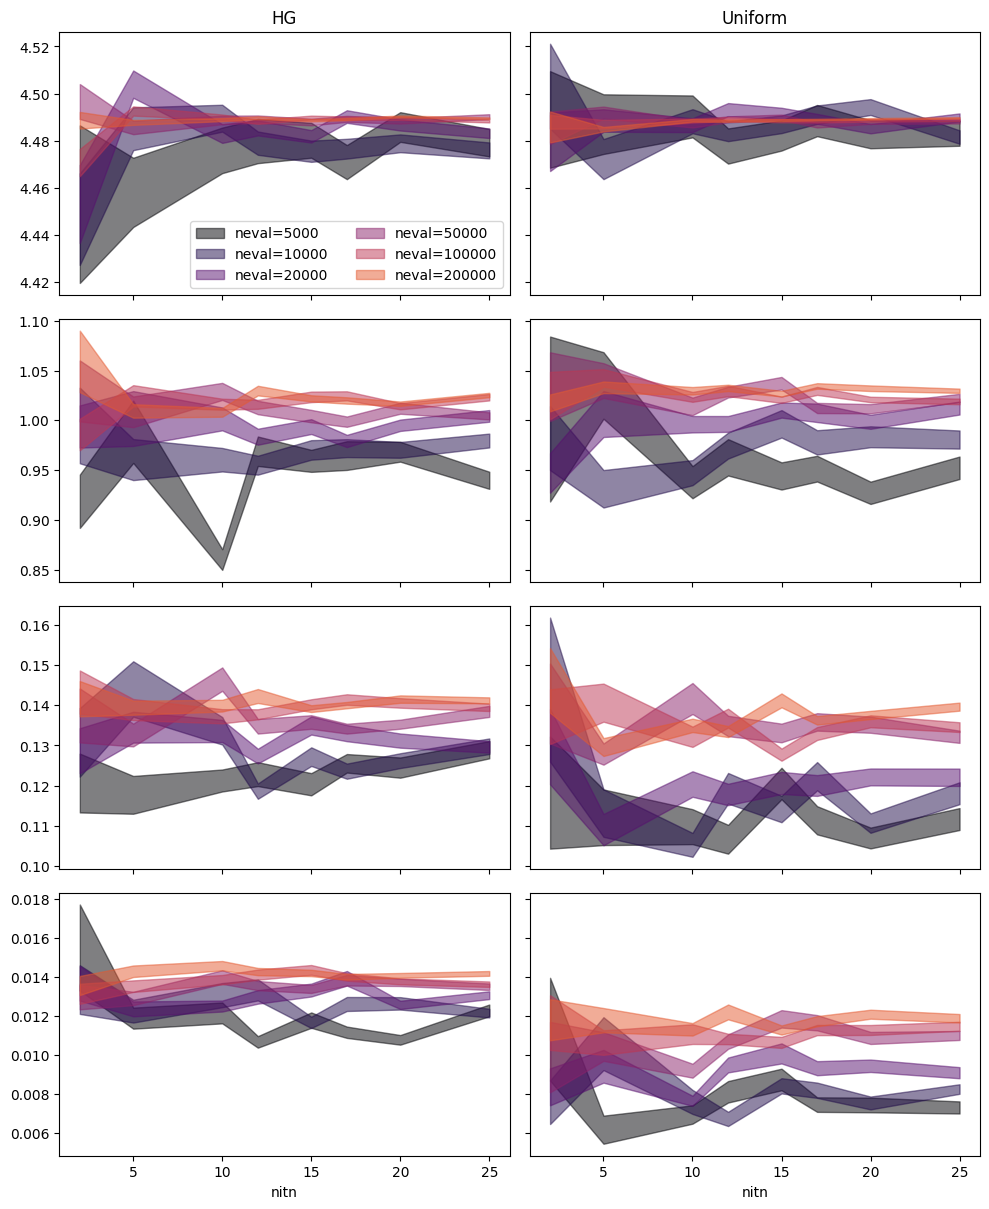

In [25]:
fig,axes = plt.subplots(len(Ns),2, sharex=True, figsize=(10,3*len(Ns)), sharey='row')

nskip=0
for i0,N in enumerate(Ns):
    for i1,val in enumerate(df.index.levels[0]):
        plt.sca(axes[i0,i1])
        axes[0,i1].set_title(val)
        for i2,neval in enumerate(params_neval):
            color=cm(i2/(len(params_nitn)-nskip))
            dft = df.swaplevel('neval','nitn',axis='columns')
            dft.sort_index(axis='columns',inplace=True)
            dfc = dft[N,neval].T[val]
            plot_band(dfc.index.values, dfc['mean'], dfc['sdev'], label=f'neval={neval}', color=color)

axes[0][0].legend(loc='lower right',ncol=2)
plt.tight_layout()
axes[-1][0].set_xlabel('nitn')
axes[-1][1].set_xlabel('nitn')
plt.show()

In [148]:
df.index.levels[0]

Index(['HG', 'Uniform'], dtype='object', name='distr')

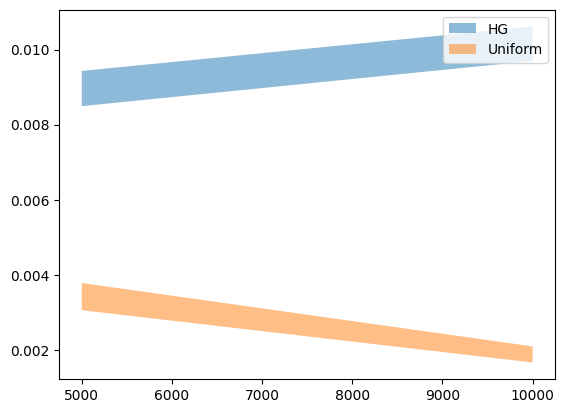

In [149]:
for val in df.index.levels[0]:   
    dfc = df[N,nitn].T[val]
    plot_band(dfs.index.values, dfc['mean'], dfc['sdev'], label=val)
plt.legend()
plt.show()

In [130]:
dfs = df.T.unstack('neval').stack(['distr'])
plot_band(dfs['mean'].values, dfs['sdev'].values)

/tmp/ipykernel_303912/2934562007.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  dfs = df.T.unstack('neval').stack(['distr'])


TypeError: plot_band() missing 1 required positional argument: 'dy'

In [89]:
cm = plt.cm.inferno

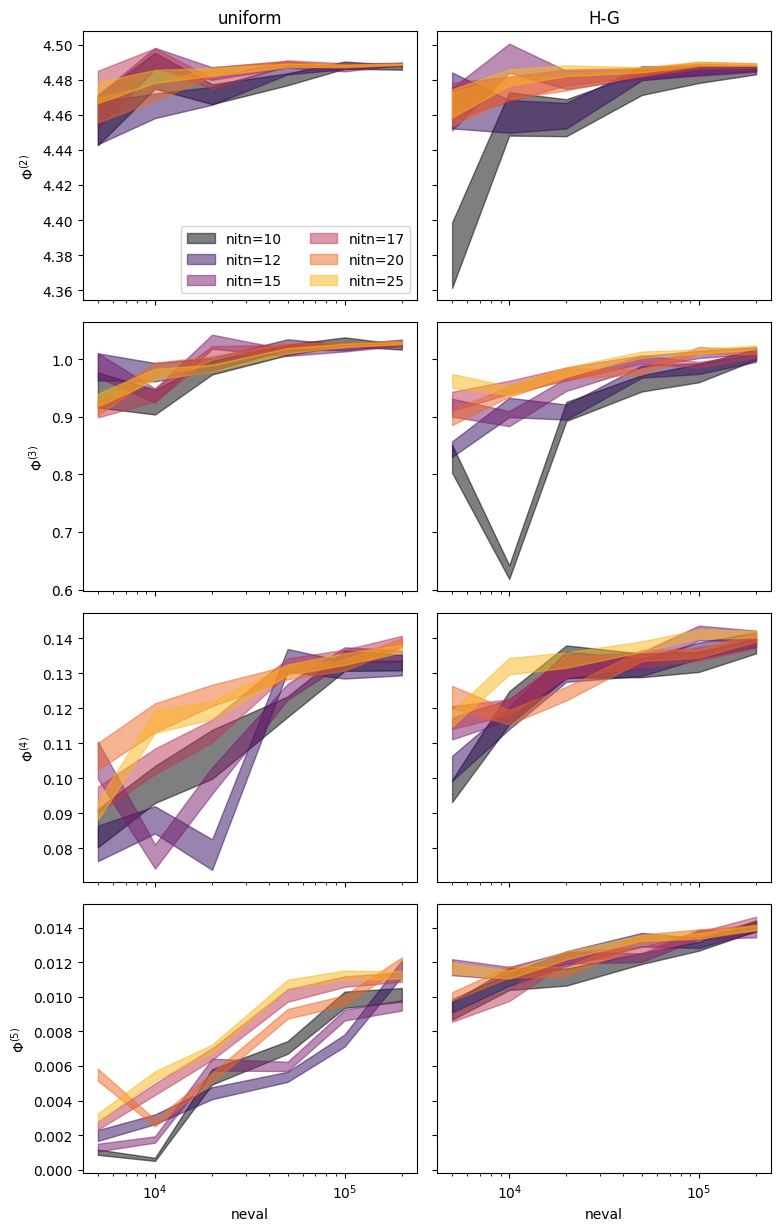

In [58]:
fig,axes = plt.subplots(len(Ns),2, sharex=True, figsize=(8,3*len(Ns)), sharey='row')
nskip = 2

for i0, N in enumerate(Ns):
    plt.sca(axes[i0][0])
    plt.ylabel(r'$\Phi^{('+str(N)+')}$')
    for i1, nitn in enumerate(params_nitn[nskip:]):
        color=cm(i1/(len(params_nitn)-nskip))
        i1+=nskip
        res_0 = results[i0,i1,:,0,:]
        res_1 = results[i0,i1,:,1,:]
        plt.sca(axes[i0][0])
        plot_band(params_neval, *res_0.T, ls='-', color=color, label=f'nitn={nitn}')
        plt.sca(axes[i0][1])
        plot_band(params_neval, *res_1.T, ls='-', color=color, label=f'nitn={nitn}')
        #plt.errorbar(params_neval, *res_0.T, ls='-', color=cm(i1/len(params_nitn)), label=f'nitn={nitn}')
        #plt.errorbar(params_neval, *res_1.T, ls=':', color=cm(i1/len(params_nitn)), label=f'nitn={nitn}')
    plt.xscale('log')
    #plt.yscale('log')
axes[0][0].legend(loc='lower right',ncol=2)
plt.tight_layout()
axes[0][0].set_title('uniform')
axes[0][1].set_title('H-G')
axes[-1][0].set_xlabel('neval')
axes[-1][1].set_xlabel('neval')
plt.show()

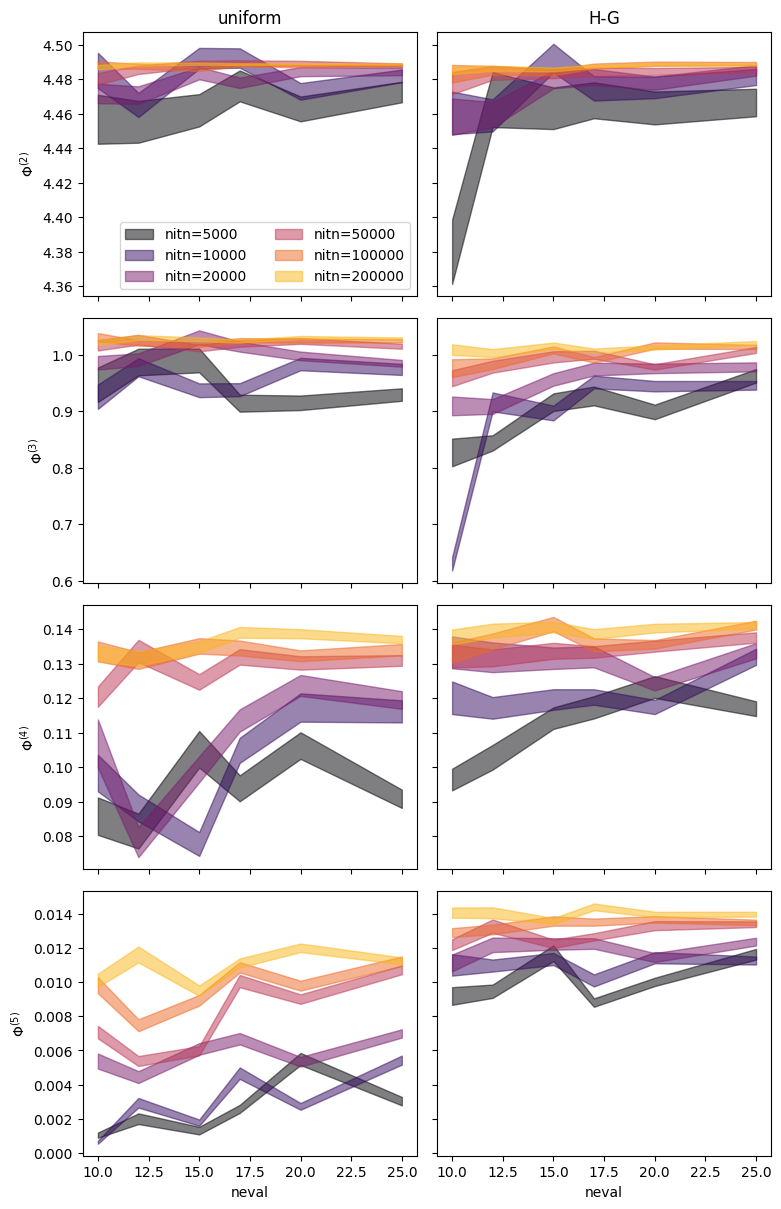

In [63]:
fig,axes = plt.subplots(len(Ns),2, sharex=True, figsize=(8,3*len(Ns)), sharey='row')
for i0, N in enumerate(Ns):
    plt.sca(axes[i0][0])
    plt.ylabel(r'$\Phi^{('+str(N)+')}$')
    for i1, n in enumerate(params_neval):
        res_0 = results[i0,nskip:,i1,0,:]
        res_1 = results[i0,nskip:,i1,1,:]
        plt.sca(axes[i0][0])
        plot_band(params_nitn[nskip:], *res_0.T, ls='-', color=cm(i1/len(params_neval)), label=f'nitn={n}')
        plt.sca(axes[i0][1])
        plot_band(params_nitn[nskip:], *res_1.T, ls='-', color=cm(i1/len(params_neval)), label=f'nitn={n}')
        #plt.errorbar(params_neval, *res_0.T, ls='-', color=cm(i1/len(params_nitn)), label=f'nitn={nitn}')
        #plt.errorbar(params_neval, *res_1.T, ls=':', color=cm(i1/len(params_nitn)), label=f'nitn={nitn}')
    
    #plt.xscale('log')
    #plt.yscale('log')
axes[0][0].set_title('uniform')
axes[0][1].set_title('H-G')
axes[0][0].legend(loc='lower right',ncol=2)
plt.tight_layout()
axes[-1][0].set_xlabel('neval')
axes[-1][1].set_xlabel('neval')
plt.show()

In [ ]:
plt.figure(figsize=(4,4))
plt.errorbar(times, v0, dv0, fmt='b-', label='Uniform trajectories')
plt.errorbar(times, v1, dv1, fmt='r-', label='H-G trajectories')
#plt.yscale('log')
plt.xscale('log')
plt.xlabel('time, s')
plt.legend()
plt.title(str(params))
plt.grid(ls=':')
plt.show()

In [ ]:
times = np.geomspace(5e-9,5e-7, 51)
p0 = rte.Process(src,tgt,medium=rte.medium.water, Nsteps=4, use_uniform_sampling=True)
p1 = rte.Process(src,tgt,medium=rte.medium.water, Nsteps=4, use_uniform_sampling=False)

In [54]:
def calc_for_times(p:rte.Process, times, **kwargs):
    res_mean = []
    res_sdev = []
    for t in tqdm(times):
        p['tgt']['T']=t
        r = p.calculate(**kwargs)
        res_mean.append(r.mean)
        res_sdev.append(r.sdev)
    return np.asarray(res_mean),np.asarray(res_sdev)

In [62]:
params = dict(nitn=20, neval=20000)
v0,dv0 = calc_for_times(p0, times, **params)
v1,dv1 = calc_for_times(p1,times, **params)

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

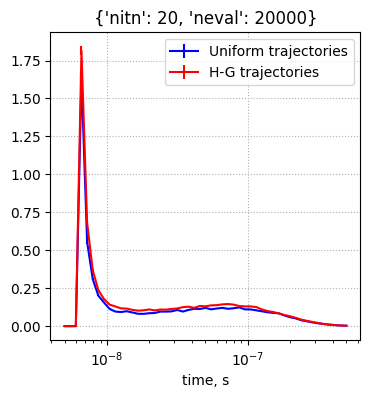

In [63]:
plt.figure(figsize=(4,4))
plt.errorbar(times, v0, dv0, fmt='b-', label='Uniform trajectories')
plt.errorbar(times, v1, dv1, fmt='r-', label='H-G trajectories')
#plt.yscale('log')
plt.xscale('log')
plt.xlabel('time, s')
plt.legend()
plt.title(str(params))
plt.grid(ls=':')
plt.show()

In [10]:
#calculate the values!
print(p['src'])
print(p['tgt'])
p.sample(1)
p.factor

NameError: name 'p' is not defined

In [ ]:
from rte.viewer import plot_trajectory
%gui qt
p.save_trajectory=True
p.sample(2)
v = plot_trajectory(p.trajectory, p.factor)
v.show()

In [ ]:
p.trajectory

In [ ]:
L_calculated = []
for n in tqdm(Ns):
    p = Process(src,tgt,medium=water,Nsteps=n, use_masking=True)
    L_n = p.calculate(nitn=10, neval=100000)
    L_calculated.append(L_n)

In [ ]:
L_calculated_total = np.sum(L_calculated)

In [ ]:
L_expected_total/L_calculated_total.mean

In [ ]:
L_mean = np.asarray([v.mean for v in L_calculated])
L_sdev = np.asarray([v.sdev for v in L_calculated])

In [ ]:
L_expected/L_mean

In [ ]:
ff=3e-3
%gui 
import pylab as plt
plt.plot(Ns, L_expected, '*k', label='Analytical values')
plt.errorbar(x=Ns, y=L_mean*ff, yerr=L_sdev*ff, fmt='*-r', label=f'RTE values $\\times$ {ff:1.0e}')
plt.xlabel(r'Number of scatterings: $n$')
plt.ylabel(r'RTE integral of $n$-th order: $\delta L^{(n)}$')
plt.legend()
#plt.yscale('log')
plt.show()